# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
numbers=np.random.randint(1,7, size=10)
data=pd.DataFrame(numbers, columns=["number"])
data

,number
0,5
1,5
2,5
3,2
4,3
5,4
6,6
7,2
8,2
9,2


#### 2.- Plot the results sorted by value.

In [3]:
data.sort_values(by=['number'], inplace=True)
data.reset_index(drop=True, inplace=True)
data


,number
0,2
1,2
2,2
3,2
4,3
5,4
6,5
7,5
8,5
9,6


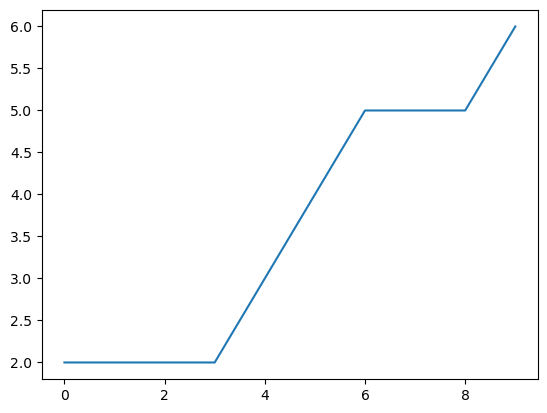

In [4]:
# your code here
plt.plot(data)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [5]:
data.value_counts() 

number
2         4
5         3
3         1
4         1
6         1
dtype: int64

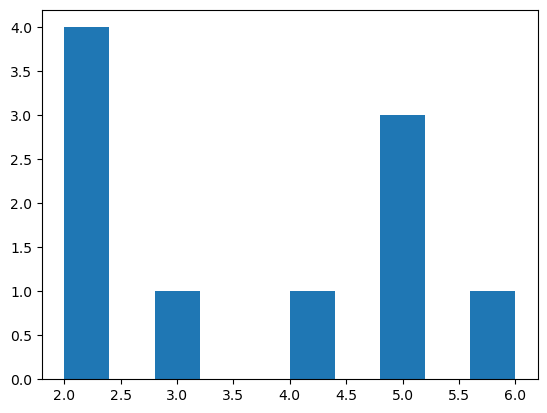

In [6]:
# your code here
plt.hist(data)
plt.show()

In [7]:
"""
your comments here
on the first we can see what numbers of the dice we got in each throw 
in the second we see the number of times we got each number
"""

'\nyour comments here\non the first we can see what numbers of the dice we got in each throw \nin the second we see the number of times we got each number\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def mean (df, column):
    mean=(df[column].sum())/len(df[column])
    return mean

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
data_freq=data.value_counts()
data_freq=data_freq.reset_index()
data_freq.columns=["number", "frequency"]
data_freq

,number,frequency
0,2,4
1,5,3
2,3,1
3,4,1
4,6,1


In [10]:
mean(data_freq, "frequency")

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [11]:
# your code here
def median (df, column):
    sorted=df.sort_values(by=[column])
    sorted.reset_index(drop=True,inplace=True)
    print(sorted)
    if (len(sorted)%2)==0:
        median=(sorted[column][(len(sorted[column])/2)-1]+sorted[column][((len(sorted[column])/2)+1)-1])/2
        return median
    else:
        median=sorted[column][(len(sorted[column])+1)/2]
        return median

In [12]:
print(np.median(data_freq)) 
median(data_freq, "frequency")

3.0
   number  frequency
0       3          1
1       4          1
2       6          1
3       5          3
4       2          4


3

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [13]:
# your code here
def quartile (df, column):
    sorted=df.sort_values(by=[column])
    sorted.reset_index(drop=True,inplace=True)
    
    q=[0.25*(len(sorted[column])+1),0.5*(len(sorted[column])+1),0.75*(len(sorted[column])+1)]
    return q   
             

In [14]:
quartile(data_freq, "frequency")

[1.5, 3.0, 4.5]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [15]:
# your code here
df=pd.read_csv("C:\\Users\\jorge\\Desktop\\Curso Ironhack\\Labs\\lab-understanding-descriptive-stats\\data\\roll_the_dice_hundred.csv")
df.head(4)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1


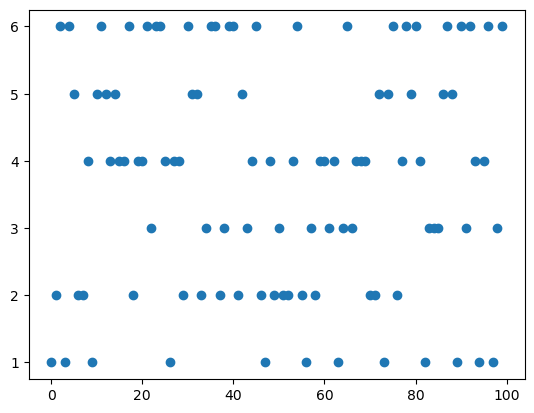

In [16]:
data=df.sort_values(by=['value'])
#data.reset_index(drop=True, inplace=True)

plt.scatter(data["roll"], data["value"])
plt.show()

In [17]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [18]:
# your code here
mean(df, "value")

3.74

#### 3.- Now, calculate the frequency distribution.


In [19]:
# your code here
df_freq=df["value"].value_counts()
df_freq=df_freq.reset_index()
df_freq.columns=["number", "frequency"]
df_freq

,number,frequency
0,6,23
1,4,22
2,2,17
3,3,14
4,1,12
5,5,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

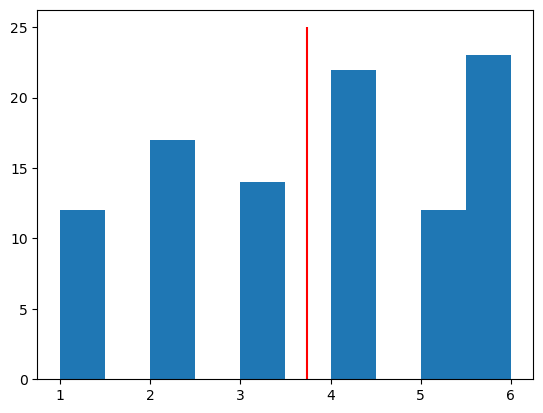

In [42]:
# your code here
plt.hist(df["value"])
plt.vlines(mean(df, "value"), 0,25, color="r")
plt.show()

In [43]:
"""
your comments here
6 is the more comun and the mean is 3.74
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [44]:
# your code here
df_2=pd.read_csv("C:\\Users\\jorge\\Desktop\\Curso Ironhack\\Labs\\lab-understanding-descriptive-stats\\data\\roll_the_dice_thousand.csv")
df_2.head(4)

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6


In [46]:
df_freq_2=df_2["value"].value_counts()
df_freq_2=df_freq_2.reset_index()
df_freq_2.columns=["number", "frequency"]
df_freq_2

,number,frequency
0,1,175
1,3,175
2,4,168
3,2,167
4,6,166
5,5,149


3.447


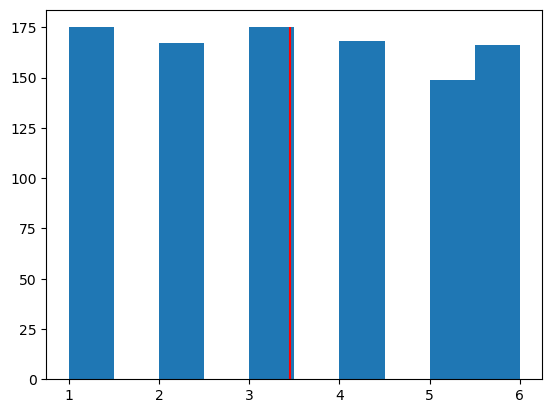

In [50]:
print(mean(df_2, "value"))

plt.hist(df_2["value"])
plt.vlines(mean(df_2, "value"), 0,175, color="r")
plt.show()

In [51]:
"""
your comments here
the mean is more or less the same and the frequency of each number is more constant
"""

'\nyour comments here\nthe mean is more or less the same and the frequency of each number is more constant\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [52]:
# your code here
df_ages_population=pd.read_csv("C:\\Users\\jorge\\Desktop\\Curso Ironhack\\Labs\\lab-understanding-descriptive-stats\\data\\ages_population.csv")
df_ages_population.head(4)

,observation
0,68.0
1,12.0
2,45.0
3,38.0


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [59]:
# your code here
print(f"mean: {df_ages_population.mean()}")
print(f"std: {df_ages_population.std()}")


mean: observation    36.56
dtype: float64
std: observation    12.8165
dtype: float64


In [26]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [60]:
# your code here
df_ages_population2=pd.read_csv("C:\\Users\\jorge\\Desktop\\Curso Ironhack\\Labs\\lab-understanding-descriptive-stats\\data\\ages_population2.csv")
df_ages_population2.head(4)

,observation
0,25.0
1,31.0
2,29.0
3,31.0


In [69]:
freq_ages_population2=df_ages_population2["observation"].value_counts()
freq_ages_population2=freq_ages_population2.reset_index()
freq_ages_population2.columns=["observation", "frequency"]
freq_ages_population2

,observation,frequency
0,28.0,139
1,27.0,125
2,26.0,120
3,29.0,115
4,25.0,98
5,30.0,90
6,24.0,78
7,31.0,61
8,23.0,41
9,22.0,35


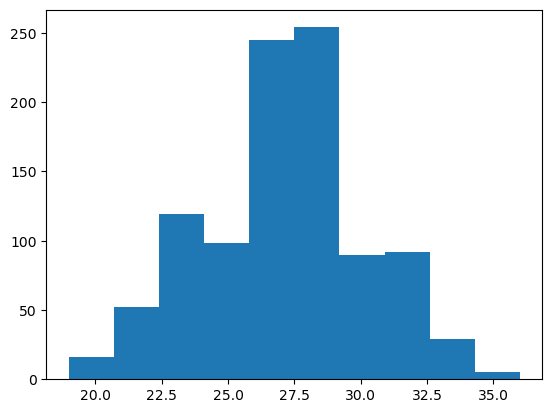

In [71]:
plt.hist(df_ages_population2["observation"])
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [28]:
"""
your comments here
yes, we have a younger population
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [72]:
# your code here
print(f"mean: {df_ages_population2.mean()}")
print(f"std: {df_ages_population2.std()}")

mean: observation    27.155
dtype: float64
std: observation    2.969814
dtype: float64


In [30]:
"""
your comments here
we have a younger population and way more concentrated  
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [4]:
# your code here
ages_population3=pd.read_csv("C:\\Users\\jorge\\Desktop\\Curso Ironhack\\Labs\\lab-understanding-descriptive-stats\\data\\ages_population3.csv")
ages_population3.head(4)

,observation
0,21.0
1,21.0
2,24.0
3,31.0


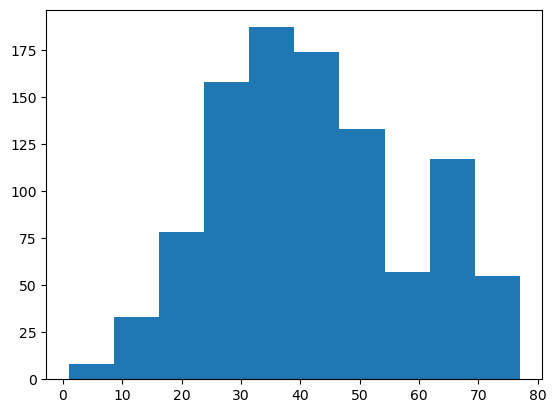

In [12]:
plt.hist(ages_population3)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [5]:
# your code here
print(f"mean: {ages_population3.mean()}")
print(f"std: {ages_population3.std()}")

mean: observation    41.989
dtype: float64
std: observation    16.144706
dtype: float64


In [33]:
"""
your comments here
older population and very spread data
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [10]:
# your code here
q0=np.quantile(ages_population3, 0)
print("Q0:", q0)

q1=np.quantile(ages_population3, 0.25)
print("Q1:", q1)

q2=np.quantile(ages_population3, 0.5)
print("Q2:", q2)

q3=np.quantile(ages_population3, 0.75)
print("Q3:", q3)

q4=np.quantile(ages_population3, 1)
print("Q4:", q4)

Q0: 1.0
Q1: 30.0
Q2: 40.0
Q3: 53.0
Q4: 77.0


In [8]:
print(np.median(ages_population3)) 

40.0


In [35]:
"""
your comments here
mean and median differ 1.9, not much
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

Q1_2: 24.0
Q2_2: 31.0
Q3_2: 47.0
Q4_2: 77.0


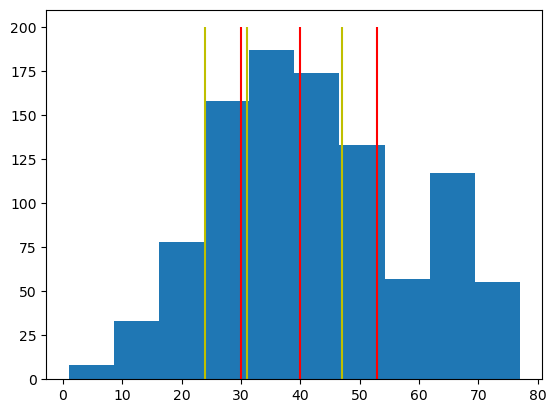

In [34]:
# your code here
q1_2=np.quantile(ages_population3, 0.13)
print("Q1_2:", q1_2)

q2_2=np.quantile(ages_population3, 0.26)
print("Q2_2:", q2_2)

q3_2=np.quantile(ages_population3, 0.64)
print("Q3_2:", q3_2)

q4_2=np.quantile(ages_population3, 1)
print("Q4_2:", q4_2)

plt.hist(ages_population3)
plt.vlines([q1,q2,q3], 0,200, color="r")
plt.vlines([q1_2,q2_2,q3_2], 0,200, color="y")
plt.show()

In [37]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [38]:
# your code here

In [39]:
"""
your comments here
"""

'\nyour comments here\n'